# Leverage knowledge from under-represented classes in machine learning: an introduction to `imbalanced-learn`

Guillaume Lemaitre

PyParis 2017

In [119]:
import numpy as np

### Dataset loader

In [202]:
from imblearn.datasets import fetch_datasets

dataset = fetch_datasets()['us_crime']
dataset

{'DESCR': 'us_crime',
 'data': array([[ 0.19,  0.33,  0.02, ...,  0.26,  0.2 ,  0.32],
        [ 0.  ,  0.16,  0.12, ...,  0.12,  0.45,  0.  ],
        [ 0.  ,  0.42,  0.49, ...,  0.21,  0.02,  0.  ],
        ..., 
        [ 0.16,  0.37,  0.25, ...,  0.32,  0.18,  0.91],
        [ 0.08,  0.51,  0.06, ...,  0.38,  0.33,  0.22],
        [ 0.2 ,  0.78,  0.14, ...,  0.3 ,  0.05,  1.  ]]),
 'target': array([-1,  1, -1, ..., -1, -1, -1])}

In [203]:
from collections import Counter
Counter(dataset.target)

Counter({-1: 1844, 1: 150})

In [238]:
X = dataset.data
y = dataset.target
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                               n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, weights=[0.01, 0.04, 0.95],
                           class_sep=0.8, random_state=0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
print('Class statistic training', Counter(y_train))
print('Class statistic testing', Counter(y_test))

Class statistic training Counter({2: 3540, 1: 162, 0: 48})
Class statistic testing Counter({2: 1180, 1: 54, 0: 16})


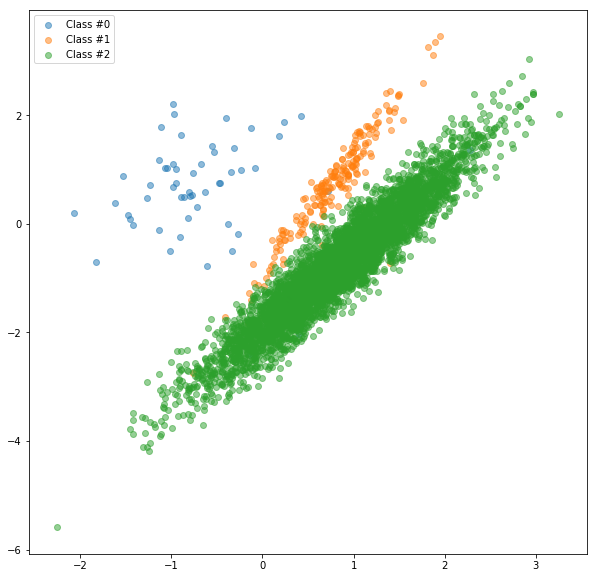

In [252]:
from sklearn.decomposition import PCA

# Two subplots, unpack the axes array immediately
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",
                 alpha=0.5)
ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax.scatter(X[y == 2, 0], X[y == 2, 1], label="Class #2",
                 alpha=0.5)
plt.legend()
plt.savefig('toy.png')

### `fit`, `sample`, and `fit_sample` methods

In [240]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_sample(X, y)

Counter(y_resampled)

Counter({0: 4720, 1: 4720, 2: 4720})

### `Pipeline` in `imbalanced-learn`

In [241]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [262]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('cm2.png')

In [254]:
from sklearn.pipeline import make_pipeline as make_pipeline_sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import roc_auc_score

pipeline_sklearn = make_pipeline_sklearn(PCA(), LogisticRegressionCV())

pipeline_sklearn.fit(X_train, y_train)
print('Score pipeline:', pipeline_sklearn.score(X_test, y_test))

Score pipeline: 0.9808


In [255]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
pipeline = make_pipeline(SMOTE(kind='borderline1'), PCA(), LogisticRegressionCV())

pipeline.fit(X_train, y_train)
print('Score pipeline:', pipeline.score(X_test, y_test))

Score pipeline: 0.9752


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.38      1.00      0.55      1.00      0.99        16
          1       0.80      0.74      0.99      0.77      0.89      0.78        54
          2       0.99      1.00      0.80      0.99      0.99      0.99      1180

avg / total       0.98      0.98      0.81      0.98      0.99      0.98      1250



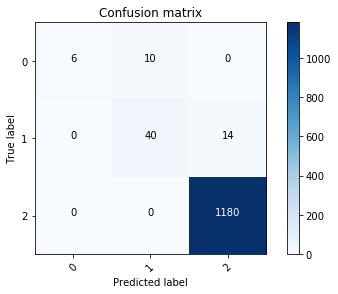

In [261]:
y_pred = pipeline_sklearn.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1, 2])

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.94      1.00      0.88      0.91      0.82        16
          1       0.67      0.91      0.98      0.77      0.82      0.65        54
          2       1.00      0.98      0.94      0.99      0.85      0.74      1180

avg / total       0.98      0.98      0.95      0.98      0.85      0.74      1250



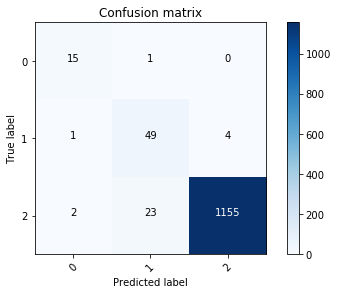

In [263]:
y_pred = pipeline.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1, 2])

In [220]:
from imblearn.datasets import fetch_datasets
fetch_datasets?